Значения осей
2693509.638889
2678648.583333
2791454.8
2798684.742857
2738190.361111
2760438.555556
2780646.027778
2780322.722222
2779831.972222
2783236.083333
2768271.666667
2723476.162162
2809040.388889
2742523.648649
2740889.594595
2738224.702703
2754682.891892
2689759.315789
2772845.216216
2721122.405405
2722962.351351
2721894.864865
2721735.918919
2632217.578947
2624755.605263
2625679.657895
2621555.315789
2672524.815789
2672521.289474
2671616.763158
2653353.052632
2023-07-01 00:00:00
2023-07-02 00:00:00
2023-07-03 00:00:00
2023-07-04 00:00:00
2023-07-05 00:00:00
2023-07-06 00:00:00
2023-07-07 00:00:00
2023-07-08 00:00:00
2023-07-09 00:00:00
2023-07-10 00:00:00
2023-07-11 00:00:00
2023-07-12 00:00:00
2023-07-13 00:00:00
2023-07-14 00:00:00
2023-07-15 00:00:00
2023-07-16 00:00:00
2023-07-17 00:00:00
2023-07-18 00:00:00
2023-07-19 00:00:00
2023-07-20 00:00:00
2023-07-21 00:00:00
2023-07-22 00:00:00
2023-07-23 00:00:00
2023-07-24 00:00:00
2023-07-25 00:00:00
2023-07-26 00:00:00
2023-0

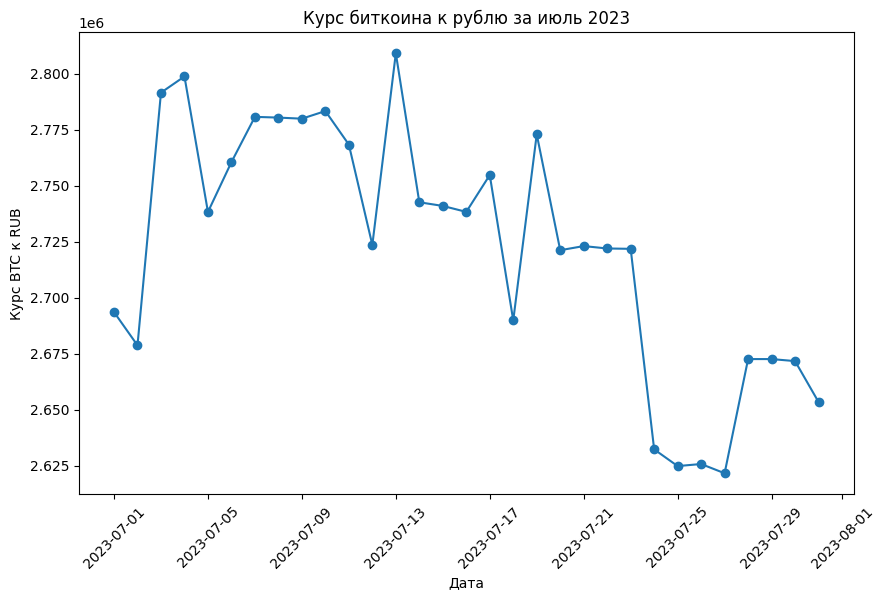

In [3]:
import requests
import matplotlib.pyplot as plt
from datetime import datetime

url = "https://api.exchangerate.host/timeseries"

params = {
    "start_date": "2023-07-01",
    "end_date": "2023-07-31",
    "base": "BTC",
    "symbols": "RUB"
}

response = requests.get(url, params=params)
data = response.json()
dates = []
rates = []

for date, values in data['rates'].items():
    dates.append(datetime.strptime(date, "%Y-%m-%d"))
    rates.append(values['RUB'])

print("Значения осей")
for rate in rates:
    print(rate)
for date in dates:
    print(date)

plt.figure(figsize=(10, 6))
plt.plot(dates, rates, marker='o')
plt.title('Курс биткоина к рублю за июль 2023')
plt.xlabel('Дата')
plt.ylabel('Курс BTC к RUB')
plt.xticks(rotation=45)
plt.show()


In [4]:
import psycopg2
import pandas as pd

connection = psycopg2.connect(
    host = 'localhost',
    port = '5432',
    user = 'user',
    password = 'secret',
    database = 'db'
)
print("Connected")
cursor = connection.cursor()

data = [('2023-07-01', 'BTC', 'RUB', 2693509.638889),
('2023-07-02', 'BTC', 'RUB', 2678648.583333),
('2023-07-03', 'BTC', 'RUB', 2791454.8),
('2023-07-04', 'BTC', 'RUB', 2798684.742857),
('2023-07-05', 'BTC', 'RUB', 2738190.361111),
('2023-07-06', 'BTC', 'RUB', 2760438.555556),
('2023-07-07', 'BTC', 'RUB', 2780646.027778),
('2023-07-08', 'BTC', 'RUB', 2780322.722222),
('2023-07-09', 'BTC', 'RUB', 2779831.972222),
('2023-07-10', 'BTC', 'RUB', 2783236.083333),
('2023-07-11', 'BTC', 'RUB', 2768271.666667),
('2023-07-12', 'BTC', 'RUB', 2723476.162162),
('2023-07-13', 'BTC', 'RUB', 2809040.388889),
('2023-07-14', 'BTC', 'RUB', 2742523.648649),
('2023-07-15', 'BTC', 'RUB', 2740889.594595),
('2023-07-16', 'BTC', 'RUB', 2738224.702703),
('2023-07-17', 'BTC', 'RUB', 2754682.891892),
('2023-07-18', 'BTC', 'RUB', 2689759.315789),
('2023-07-19', 'BTC', 'RUB', 2772845.216216),
('2023-07-20', 'BTC', 'RUB', 2721122.405405),
('2023-07-21', 'BTC', 'RUB', 2722962.351351),
('2023-07-22', 'BTC', 'RUB', 2721894.864865),
('2023-07-23', 'BTC', 'RUB', 2721735.918919),
('2023-07-24', 'BTC', 'RUB', 2632217.578947),
('2023-07-25', 'BTC', 'RUB', 2624755.605263),
('2023-07-26', 'BTC', 'RUB', 2625679.657895),
('2023-07-27', 'BTC', 'RUB', 2621555.315789),
('2023-07-28', 'BTC', 'RUB', 2672524.815789),
('2023-07-29', 'BTC', 'RUB', 2672521.289474),
('2023-07-30', 'BTC', 'RUB', 2671616.763158),
('2023-07-31', 'BTC', 'RUB', 2653353.052632)]

info = ','.join(cursor.mogrify("(%s,%s,%s,%s)",i).decode('utf-8') for i in data)

cursor.execute("INSERT INTO exchange (date, first_c, second_c, exchange_rate) VALUES " + (info))
connection.commit() 

cursor.execute("Select * from exchange")
out = cursor.fetchall()

df = pd.DataFrame(out, columns = ('id', 'date', 'first_c', 'second_c', 'exchange_rate'))

print(df)

cursor.close()

connection.close()

Connected
    id        date first_c second_c exchange_rate
0    1  2023-07-01     BTC      RUB    2693509.64
1    2  2023-07-02     BTC      RUB    2678648.58
2    3  2023-07-03     BTC      RUB    2791454.80
3    4  2023-07-04     BTC      RUB    2798684.74
4    5  2023-07-05     BTC      RUB    2738190.36
5    6  2023-07-06     BTC      RUB    2760438.56
6    7  2023-07-07     BTC      RUB    2780646.03
7    8  2023-07-08     BTC      RUB    2780322.72
8    9  2023-07-09     BTC      RUB    2779831.97
9   10  2023-07-10     BTC      RUB    2783236.08
10  11  2023-07-11     BTC      RUB    2768271.67
11  12  2023-07-12     BTC      RUB    2723476.16
12  13  2023-07-13     BTC      RUB    2809040.39
13  14  2023-07-14     BTC      RUB    2742523.65
14  15  2023-07-15     BTC      RUB    2740889.59
15  16  2023-07-16     BTC      RUB    2738224.70
16  17  2023-07-17     BTC      RUB    2754682.89
17  18  2023-07-18     BTC      RUB    2689759.32
18  19  2023-07-19     BTC      RUB    2

День, в который значение курса было максимальным:

In [5]:
max_date = df[df['exchange_rate']==df['exchange_rate'].max()]
max_date = max_date[['date']]
max_date.columns = ['max_date'] 
max_date.reset_index(drop = True, inplace = True)
max_date

,max_date
0,2023-07-13


День, в который значение курса было минимальным:

In [6]:
min_date = df[df['exchange_rate']==df['exchange_rate'].min()]
min_date = min_date[['date']]
min_date.columns = ['min_date']
min_date.reset_index(drop = True, inplace = True)
min_date

,min_date
0,2023-07-27


Максимальное значение курса:

In [7]:
max = df['exchange_rate'].max()
max = pd.DataFrame([max], columns = ['max'])
max

,max
0,2809040.39


Минимальное значение курса:

In [8]:
min = df['exchange_rate'].min()
min = pd.DataFrame([min], columns = ['min'])
min

,min
0,2621555.32


Среднее значение курса за весь месяц:

In [9]:
mean = round(df['exchange_rate'].mean(),1)
mean = pd.DataFrame([mean], columns = ['mean'])
mean

,mean
0,2722148.9


Значение курса на последний день месяца:

In [10]:
last_day_value = df.loc[30]['exchange_rate']
last_day_value = pd.DataFrame([last_day_value], columns = ['last_day_value'])
last_day_value

,last_day_value
0,2653353.05


Общий вывод:

In [12]:
info = [['BTC', 'RUB']]
t_info = pd.DataFrame(info, columns = ['first_cur', 'second_cur'])
table = pd.concat([t_info, max_date, max, min_date, min, mean, last_day_value], axis = 1)
table

,first_cur,second_cur,max_date,max,min_date,min,mean,last_day_value
0,BTC,RUB,2023-07-13,2809040.39,2023-07-27,2621555.32,2722148.9,2653353.05
